# Elastic Net Regression on Auto MPG Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the dataset
df = pd.read_csv('auto-mpg.csv')

# Preprocessing
df['horsepower'] = df['horsepower'].replace('?', np.nan)
df = df.dropna()
df['horsepower'] = df['horsepower'].astype(float)
df = df.drop('car name', axis=1)

X = df.drop('mpg', axis=1)
y = df['mpg']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# Train Model
model = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 10.654694006253191
R2 Score: 0.7912505435883948


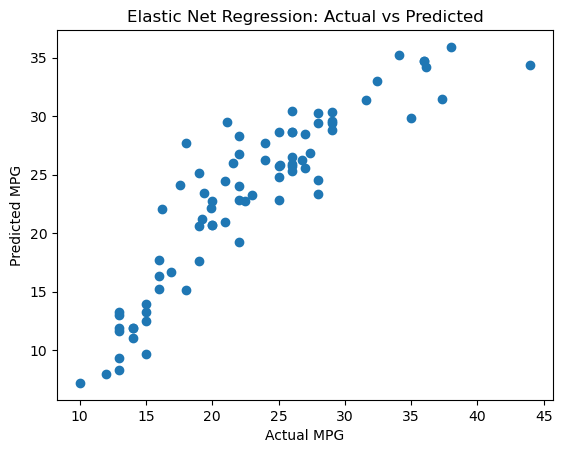

In [4]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.title('Elastic Net Regression: Actual vs Predicted')
plt.show()